# Setup

In [1]:
!mkdir -p projects
%cd projects

/content/projects


In [2]:
!git clone https://github.com/labrem/startup_ownership.git

Cloning into 'startup_ownership'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 31 (delta 13), reused 21 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (31/31), 5.32 KiB | 778.00 KiB/s, done.
Resolving deltas: 100% (13/13), done.


In [3]:
%cd startup_ownership

/content/projects/startup_ownership


In [4]:
import numpy as np
import pandas as pd

In [5]:
from src.data import get_valuation
from src.data import get_ownership
from src.compute import simulate_ownership
from src.compute import compute_stats
from src.other import plot_simulation

In [6]:
stages = ['Seed', 'Series A', 'Series B', 'Series C', 'Series D+']

# Data

In [7]:
valuation_data = pd.read_csv('./data/valuation.csv')

In [8]:
valuation = get_valuation(data=valuation_data, stages=stages)
valuation

{'Seed': {'values': array([13. , 14. , 14.8, 16. , 20. ]),
  'probabilities': array([0.22222222, 0.11111111, 0.11111111, 0.33333333, 0.22222222])},
 'Series A': {'values': array([40., 48., 52.]),
  'probabilities': array([0.5 , 0.25, 0.25])},
 'Series B': {'values': array([100.7, 105. , 124. ]),
  'probabilities': array([0.33333333, 0.33333333, 0.33333333])},
 'Series C': {'values': array([164., 195., 248.]),
  'probabilities': array([0.33333333, 0.33333333, 0.33333333])},
 'Series D+': {'values': array([544., 754.]),
  'probabilities': array([0.5, 0.5])}}

In [9]:
ownership_data = pd.read_csv('./data/ownership.csv')

In [10]:
ownership = get_ownership(data=ownership_data, stages=stages)
ownership

{'Seed': {'values': array([0.248, 0.43 , 0.562, 0.667, 0.75 , 1.   ]),
  'probabilities': array([0.1 , 0.15, 0.25, 0.25, 0.15, 0.1 ])},
 'Series A': {'values': array([0.103, 0.233, 0.361, 0.482, 0.596, 1.   ]),
  'probabilities': array([0.1 , 0.15, 0.25, 0.25, 0.15, 0.1 ])},
 'Series B': {'values': array([0.045, 0.123, 0.23 , 0.327, 0.428, 1.   ]),
  'probabilities': array([0.1 , 0.15, 0.25, 0.25, 0.15, 0.1 ])},
 'Series C': {'values': array([0.027, 0.086, 0.157, 0.24 , 0.335, 1.   ]),
  'probabilities': array([0.1 , 0.15, 0.25, 0.25, 0.15, 0.1 ])},
 'Series D+': {'values': array([0.021, 0.059, 0.114, 0.196, 0.266, 1.   ]),
  'probabilities': array([0.1 , 0.15, 0.25, 0.25, 0.15, 0.1 ])}}

# Compute

In [11]:
samples = simulate_ownership(ownership=ownership, valuation=valuation, stages=stages, size=100000, seed=2324)

In [12]:
stats = compute_stats(samples, stages)

# Plot

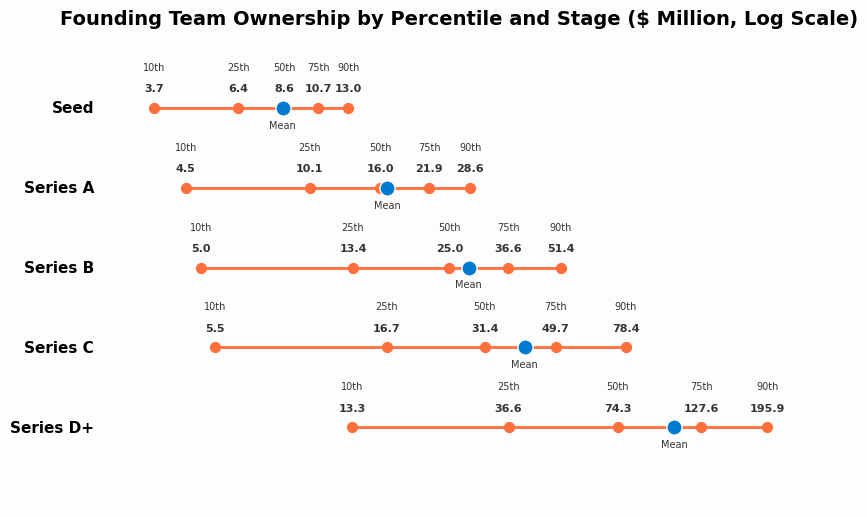

In [16]:
plot_simulation(stages=stages, stats=stats, title='Founding Team Ownership by Percentile and Stage ($ Million, Log Scale)')